# Cuarteto de ASCOMBE

El objetivo de este practico es identificar el comportamiento de los datos de manera visual, teniendo como presedente que su media(μ) y desviación estandar(σ) son iguales y asi asignar a cada grupo el dato que pertenece.


|Sno | x  |  y | 
|---:|:---|:---|
| 1. | 16| 8| 
| 2. | 8 | 6| 
| 3. | 16|10|
| 4. | 16| 6| 
  
Cada punto corresponde a un único dataset. Sin embargo, los parámetros estadísticos de los cuatro datasets son idénticos.

**¿Cómo determinar entonces a qué dataset corresponde cada punto?**

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Se carga el **csv** que contiene los datos.

In [61]:
def cuarteto_dataset(file_name):
    
    df = pd.read_csv(file_name)
    
    # dataset 1
    df1 = df[0:11]
    df1 = df1.drop('data', axis=1)#eliminanos la column data ya que es la que identifica cada dataset y no es util.
    
    #dataset 2
    df2 = df[11:22]
    df2 = df2.drop('data', axis=1)
    df2 = df2.reset_index()
    df2 = df2.drop('index', axis=1)
    
    #dataset 3
    df3 = df[22:33]
    df3 = df3.drop('data', axis=1)
    df3 = df3.reset_index()
    df3 = df3.drop('index', axis=1)
    
    #dataset 4
    df4 = df[33:]
    df4 = df4.drop('data', axis=1)
    df4 = df4.reset_index()
    df4 = df4.drop('index', axis=1)
    
    return df1, df2, df3, df4

In [62]:
df1, df2, df3, df4 = cuarteto_dataset('anscombe.csv')

## 1.2 Verificamos de que se han generado los dataset correctos.

In [63]:
df4

,x,y
0,8,6.58
1,8,5.76
2,8,7.71
3,8,8.84
4,8,8.47
5,8,7.04
6,8,5.25
7,19,12.50
8,8,5.56
9,8,7.91


# 2. Visualizamos los datasets.

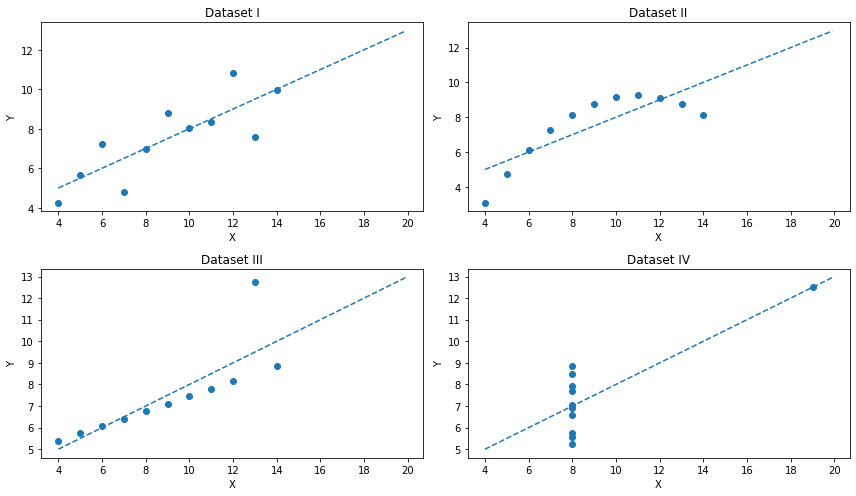

In [64]:
# All datasets
datasets_dict = {'I': df1, 
                 'II': df2, 
                 'III': df3, 
                 'IV': df4}

# Grid of 2 rows and columns
fig, axs = plt.subplots(2, 2, figsize=(12,7))

# Regression line
x = np.arange(4, 20, 0.1)
y = 3 + 0.5*x

# Adds each dataset points to an `axs` axis
row, col = 0, 0
for dataset_name, dataset in datasets_dict.items():

  axs[row, col].scatter(dataset['x'], dataset['y'])
  axs[row, col].plot(x, y, '--')
  axs[row, col].set_title('Dataset ' + dataset_name)
  axs[row, col].set_xlabel('X')
  axs[row, col].set_ylabel('Y')

  col += 1
  if col > (len(axs[0]) - 1):
    row += 1
    col = 0

# Displays plots
plt.tight_layout()
plt.show()

## 2.1  Ahora bien, ubicamos los puntos en cada dataset para asi identificar a que grupo pertenecen.

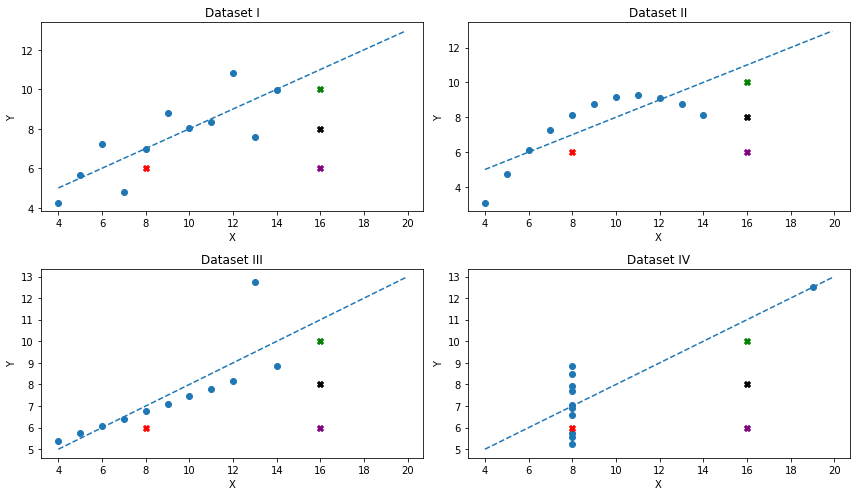

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(12,7))

row, col = 0, 0
for dataset_name, dataset in datasets_dict.items():

  axs[row, col].scatter(dataset['x'], dataset['y'])
  axs[row, col].plot(x, y, '--')
  axs[row, col].set_title('Dataset ' + dataset_name)
  axs[row, col].set_xlabel('X')
  axs[row, col].set_ylabel('Y')

  axs[row, col].scatter(16, 8, c='k',  marker='X')
  axs[row, col].scatter(8, 6, c='red',  marker='X' )
  axs[row, col].scatter(16, 10, c='green',  marker='X' )
  axs[row, col].scatter(16, 6, c='purple',  marker='X')

  col += 1
  if col > (len(axs[0]) - 1):
    row += 1
    col = 0

plt.tight_layout()
plt.show()

# 3. Conclusiones

1. Podemos concluir que siempre es necesario visualizar los datos con los que estamos trabajando, no siempre las metricas que se obtienen de estos son lo suficientemente explicativas.

2. La coordenada [16, 6], parece pertenecer al grupo del dataset 2, solo si el comportamiento de la regresión fuese polinomica.

3. La coordenada [16, 10], se ajusta al grupo del primer dataset teniendo en cuenta como se encuentran dispersos los datos,  se podria decir que continua con el patron de disperción.

4. La coordenada [8, 6], me genera cierta incertidumbre porque da la impresion de que podria pertenecer a dos grupos, tanto al dataset 1 como al dataset 4, claro eso es mi opinión ya que esto podria cambiar dependiento del observador.

Para finalizar este tipo de datos nos permiten entender que en la realidad pueden presentarse este tipo de comportamiento en los datos y obtener sus metricas no es suficiente para determinar su comportamiento, siempre se ha dicho que una imagen vale mas que mil palabras, para este caso seria una grafica vale mas que mil metricas.